# **Get the Titanic Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/My Drive/Datasets/Titanic/train.csv')
test=pd.read_csv('/content/drive/My Drive/Datasets/Titanic/test.csv')


In [ ]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Merge the Train and the Test set**

In [ ]:
# Create a combined dataset to introduce new features
# remove the survived column from train dataset and merge with test dataset

train_1=train
test_1=test

# create a sub-dataset for submission file and saving it

Passenger_Ids = test['PassengerId']




In [ ]:
combined=train_1.append(test_1, ignore_index = True)

combined.shape

(1309, 12)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Feature Engineering***

In [ ]:
name_0 = combined.Name[0]

name_0


'Braund, Mr. Owen Harris'

In [ ]:
name_0.split(',')[1].split('.')[0].strip()

'Mr'

In [ ]:
# Feature : Title of the passengers

combined['Title'] = combined.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

combined['Title'] = combined['Title'].replace(to_replace =["Mlle", "Ms","Mme"],value ="Miss")

combined['Title'] = combined['Title'].replace(to_replace =['Capt', 'Don', 'Major', 'Sir','Col','Dr','Rev','Dona', 'Lady','Jonkheer', 'the Countess'],value ="noble")

combined['Title'].value_counts()


Mr        757
Miss      265
Mrs       197
Master     61
noble      29
Name: Title, dtype: int64

In [ ]:
# Recover the train and test set back

train=combined[0:890]
test=combined[891:1309]

# drop the Survived column from the test set

test.drop(["Survived"], 1, inplace=True) 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


# **Preprocessing Train Dataset**

In [ ]:
np.median(train.Age)

nan

In [ ]:
# Cleanup and Impute Missing Values

train.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

train.Age = train.Age.fillna(np.round(np.mean(train.Age),1))

train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    float64
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  890 non-null    object 
 8   Title     890 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 62.7+ KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [ ]:
categories = ['Sex','Pclass','Embarked', 'Title']

codes = {}
for col in categories:
    values = sorted(list(train[col].unique()))
    mapper = dict(zip(values, range(len(values))))
    codes[col] = mapper
    train[col] = train[col].replace(mapper)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
codes

{'Embarked': {'C': 0, 'Q': 1, 'S': 2},
 'Pclass': {1: 0, 2: 1, 3: 2},
 'Sex': {'female': 0, 'male': 1},
 'Title': {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'noble': 4}}

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    float64
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    int64  
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  890 non-null    int64  
 8   Title     890 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,2,1,22.0,1,0,7.2500,2,2
1,1.0,0,0,38.0,1,0,71.2833,0,3
2,1.0,2,0,26.0,0,0,7.9250,2,1
3,1.0,0,0,35.0,1,0,53.1000,2,3
4,0.0,2,1,35.0,0,0,8.0500,2,2


In [ ]:
for col in categories:
  train[col]=train[col].astype("category")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train['Survived']=train['Survived'].astype("category")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  890 non-null    category
 1   Pclass    890 non-null    category
 2   Sex       890 non-null    category
 3   Age       890 non-null    float64 
 4   SibSp     890 non-null    int64   
 5   Parch     890 non-null    int64   
 6   Fare      890 non-null    float64 
 7   Embarked  890 non-null    category
 8   Title     890 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 32.9 KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,2,1,22.0,1,0,7.2500,2,2
1,1.0,0,0,38.0,1,0,71.2833,0,3
2,1.0,2,0,26.0,0,0,7.9250,2,1
3,1.0,0,0,35.0,1,0,53.1000,2,3
4,0.0,2,1,35.0,0,0,8.0500,2,2


In [ ]:
X_train = train.iloc[:,1:] # feature

y_train = train.iloc[:,0]

# **Preprocessing Test Dataset**

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
891,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
893,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
894,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

We will drop the passenger column and impute the Age and Fare column

In [ ]:
# Cleanup and Impute Missing Values

Passenger_Ids = test['PassengerId']

test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

test.Age = test.Age.fillna(np.round(np.mean(test.Age),1))

test.Fare = test.Fare.fillna(np.round(np.mean(test.Fare),1))


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# 
categories = ['Sex','Pclass','Embarked', 'Title']
codes = {}
for col in categories:
    values = sorted(list(test[col].unique()))
    mapper = dict(zip(values, range(len(values))))
    codes[col] = mapper
    test[col] = test[col].replace(mapper)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
codes

{'Embarked': {'C': 0, 'Q': 1, 'S': 2},
 'Pclass': {1: 0, 2: 1, 3: 2},
 'Sex': {'female': 0, 'male': 1},
 'Title': {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'noble': 4}}

In [ ]:
codes['Survived'] = {'dead':0, 'survived':1}

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [ ]:
for col in categories:
  test[col]=test[col].astype("category")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    category
 2   Age       418 non-null    float64 
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      418 non-null    float64 
 6   Embarked  418 non-null    category
 7   Title     418 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 15.3 KB


In [ ]:
X_test = test

# **Decision Tree Model**

In [ ]:
############################# Build Decision Tree

from sklearn import tree


dtc = tree.DecisionTreeClassifier(max_depth = 4,
                                  random_state=1,
                                  criterion='gini',
                                  min_samples_leaf=4,
                                  min_samples_split = 2,
                                  max_features = 5)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Make predictions
 
y_predict = dtc.predict(X_test)
 
y_predict_prob = dtc.predict_proba(X_test)

In [ ]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## **Cross Validation (10-fold)**

In [ ]:
#################### Evaluate Model Performance using Cross validation

from sklearn.model_selection import cross_val_score


In [ ]:
scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75280899 0.83146067 0.7752809  0.85393258 0.83146067 0.80898876
 0.83146067 0.78651685 0.86516854 0.84269663]
Mean: 0.8179775280898876
Standard Deviation: 0.03437541245118732


## ***Feature Importance***

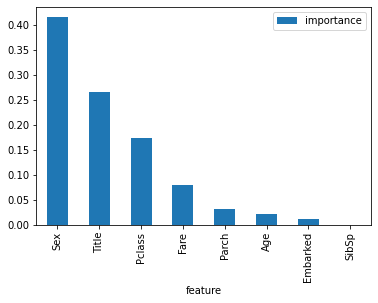

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dtc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
importances.plot.bar()



## **Kaggle Submission for Improved DT**

In [ ]:
########################### Prepare Submission file for Kaggle

result = pd.DataFrame({ "PassengerId" : Passenger_Ids, "Survived": y_predict.astype(int) })
result.to_csv("solution-DT.csv", index=False) # write the final dataset to a csv file.

# When we submit this to Kaggle we get a score of ~ 77.99% 


## **Grid Search**

In [ ]:
%%script false
######################### Do a Grid Search to find Optimum params

param_grid = { "criterion" : ["entropy", "gini"]
, "max_features" : list(range(4,9))
, "max_depth" : [4,5,6,7]
, "min_samples_leaf" : [2, 3, 4, 5]
, "min_samples_split" : [2, 3, 4, 5]}

#%%script false
from sklearn.model_selection import GridSearchCV

dtc_grid = tree.DecisionTreeClassifier(random_state=1)

clf = GridSearchCV(estimator=dtc_grid, param_grid=param_grid, cv=10, n_jobs=-1)

clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

# make predictions using best model

#clf.best_estimator_.predict(X_test)


scores_2 = cross_val_score(clf.best_estimator_, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores_2)
print("Mean:", scores_2.mean())
print("Standard Deviation:", scores_2.std())

### **Kaggle Submission for Improved DT**

In [ ]:
# Make predictions on the Kaggle test dataset
%%script false

predictions_kaggle = clf.best_estimator_.predict(X_test)

In [ ]:
########################### Prepare Submission file for Kaggle
%%script false

result = pd.DataFrame({ "PassengerId" : Passenger_Ids, "Survived": predictions_kaggle.astype(int) })
result.to_csv("solution-4-GridSearch.csv", index=False) # write the final dataset to a csv file.

# When we submit this to Kaggle we get a score of ~

# **Random Forest**

In [ ]:
############################# Use the Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(max_depth = 4,
                                  random_state=1,
                                  criterion='gini',
                                  max_features = 5,
                                  n_estimators = 500)

forest.fit(X_train, y_train)

predictions = forest.predict(X_test)

acc_rf = round(forest.score(X_train, y_train) * 100, 2)
print('Accuracy of Random Forest: ', acc_rf, '%')


Accuracy of Random Forest:  84.49 %


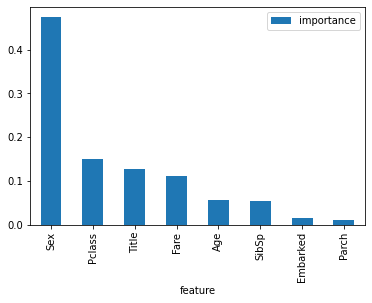

In [ ]:

# Feature importance 
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importances.plot.bar()



In [ ]:
########################### Cross validate

scores = cross_val_score(forest, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.84269663 0.85393258 0.7752809  0.86516854 0.85393258 0.80898876
 0.82022472 0.7752809  0.87640449 0.84269663]
Mean: 0.8314606741573034
Standard Deviation: 0.033707865168539325


In [ ]:
########################### Prepare Submission file for Kaggle

result = pd.DataFrame({ "PassengerId" : Passenger_Ids, "Survived": predictions.astype(int) })
result.to_csv("solution-random-forest.csv", index=False) # write the final dataset to a csv file.

# the score has improved ~ 77.75%

# ***K Nearest Neighbours***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

# Make predictions

predictions = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train)*100, 2)
print('Accuracy of k-Nearest Neighbors: ', acc_knn, '%')


Accuracy of k-Nearest Neighbors:  77.75 %


In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.64044944 0.62921348 0.65168539 0.74157303 0.74157303 0.68539326
 0.73033708 0.71910112 0.69662921 0.74157303]
Mean: 0.697752808988764
Standard Deviation: 0.04187560708670613
